<a href="https://colab.research.google.com/github/natnew/Python-Projects-Graphing-Weather-Data/blob/main/Graphing_The_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Station Equipment

Rain gauge - 	Measures the volume of rain falling in millimetres
Anemometer -	Measures the wind speed in kilometres per hour
Weathervane	- Measures the wind direction in degrees
Soil temperature probe -	Measures the soil temperature in degrees Celsius
Temperature sensor -	Measures the air temperature in degrees Celsius
Humidity sensor	- Measures the relative humidity of the air as a percentage
Pressure sensor -	Measures the atmospheric pressure in Pascals

Air quality sensor -	Measures the air quality as a relative percentage

The Weather Stations continually monitor the weather and then send their data to an Oracle database, where it is stored and can be accessed.

I will choose from one of the many weather stations in the database and bulk download some weather data. I will then use Python to display the data.

## Resources: https://projects.raspberrypi.org/en/projects/fetching-the-weather/

# Import functions and methods

In [6]:
from requests import get
import matplotlib.pyplot as plt
from dateutil import parser

# Fetch Data Set

Declare a variable and store the data

In [7]:
url = 'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallmeasurements/505307'

Make a call to the API

In [8]:
weather = get(url).json()

# Looking At The JSON

In [9]:
>>> weather['items']

[{'air_pressure': 982.51,
  'air_quality': 75.82,
  'ambient_temp': 9.77,
  'created_by': 'Test Brompton Academy',
  'created_on': '2016-11-19T22:50:00Z',
  'ground_temp': -1000,
  'humidity': 71.11,
  'id': 1707846,
  'rainfall': 0,
  'reading_timestamp': '2016-11-19T22:50:00Z',
  'updated_by': 'Test Brompton Academy',
  'updated_on': '2016-11-20T00:56:09.435Z',
  'weather_stn_id': 505307,
  'wind_direction': 111.92,
  'wind_gust_speed': 22.8,
  'wind_speed': 12.34},
 {'air_pressure': 983.08,
  'air_quality': 75.77,
  'ambient_temp': 9.82,
  'created_by': 'Test Brompton Academy',
  'created_on': '2016-11-19T22:40:00Z',
  'ground_temp': -1000,
  'humidity': 71.07,
  'id': 1707845,
  'rainfall': 0,
  'reading_timestamp': '2016-11-19T22:40:00Z',
  'updated_by': 'Test Brompton Academy',
  'updated_on': '2016-11-20T00:56:08.955Z',
  'weather_stn_id': 505307,
  'wind_direction': 119.62,
  'wind_gust_speed': 28.56,
  'wind_speed': 14.88},
 {'air_pressure': 983.58,
  'air_quality': 75.62,
  '

# Get The Time And Temperature

In [10]:
>>> first_record = weather['items'][0]

In [11]:
first_record

{'air_pressure': 982.51,
 'air_quality': 75.82,
 'ambient_temp': 9.77,
 'created_by': 'Test Brompton Academy',
 'created_on': '2016-11-19T22:50:00Z',
 'ground_temp': -1000,
 'humidity': 71.11,
 'id': 1707846,
 'rainfall': 0,
 'reading_timestamp': '2016-11-19T22:50:00Z',
 'updated_by': 'Test Brompton Academy',
 'updated_on': '2016-11-20T00:56:09.435Z',
 'weather_stn_id': 505307,
 'wind_direction': 111.92,
 'wind_gust_speed': 22.8,
 'wind_speed': 12.34}

Sensor data recorded for a specific time

Find the ambient air temperature for an instance

In [12]:
>>> weather['items'][0]['ambient_temp']

9.77

In [15]:
weather['items'][0]['wind_speed']

12.34

In [13]:
second_record = weather['items'][1]

In [14]:
second_record

{'air_pressure': 983.08,
 'air_quality': 75.77,
 'ambient_temp': 9.82,
 'created_by': 'Test Brompton Academy',
 'created_on': '2016-11-19T22:40:00Z',
 'ground_temp': -1000,
 'humidity': 71.07,
 'id': 1707845,
 'rainfall': 0,
 'reading_timestamp': '2016-11-19T22:40:00Z',
 'updated_by': 'Test Brompton Academy',
 'updated_on': '2016-11-20T00:56:08.955Z',
 'weather_stn_id': 505307,
 'wind_direction': 119.62,
 'wind_gust_speed': 28.56,
 'wind_speed': 14.88}

In [16]:
weather['items'][1]['air_pressure']

983.08

In [17]:
weather['items'][1]['rainfall']

0

# Extract all the temperatures from the weather data set

In [20]:
## list comprehension to get all the temperatures in a list
temperatures = [record['ambient_temp'] for record in weather['items']]

In [ ]:
temperatures

Extract timestamp

In [23]:
## list comprehension to get all the timestamps in a list
timestamps = [record['reading_timestamp'] for record in weather['items']]

In [ ]:
timestamps

Change the timestamp format from ISO 8601 to a datetime object that Pthon can easily read

In [26]:
parser.parse(weather['items'][0]['reading_timestamp'])

datetime.datetime(2016, 11, 19, 22, 50, tzinfo=tzlocal())

In [27]:
## list comprehension to get all the temperatures in a list in a readable format
timestamps = [parser.parse(record['reading_timestamp']) for record in weather['items']]

In [ ]:
timestamps

# Graphing Data

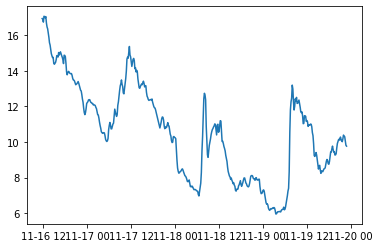

In [31]:
## create a plot of timestamps against temperature and show it
plt.plot(timestamps, temperatures)
plt.show()

Edit graph

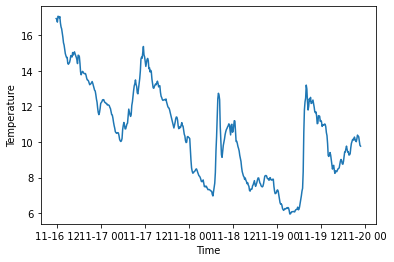

In [32]:
plt.plot(timestamps, temperatures)
## Set the axis labels
plt.ylabel('Temperature')
plt.xlabel('Time')
plt.show()

# Extracting more data

In [43]:
weather['items'][1]['air_pressure']

983.08

In [44]:
## list comprehension to get all the temperatures in a list
air_pressure = [record['air_pressure'] for record in weather['items']]

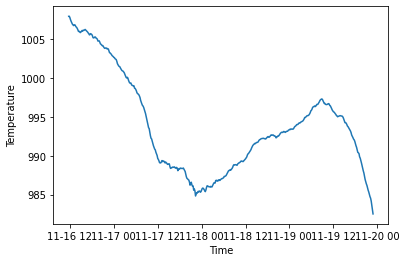

In [45]:
plt.plot(timestamps, air_pressure)
## Set the axis labels
plt.ylabel('Temperature')
plt.xlabel('Time')
plt.show()